# Lý thuyết nội suy

Biên soạn: Lê Xuân Trường

## Bài toán nội suy

Giả sử $y = f(x)$ là một hàm chưa biết. Bằng các công cụ thực nghiệm ta có một tập dữ liệu bao gồm $N$ điểm dữ liệu $(x_1, y_1), ..., (x_N, y_N)$, với

$x_i$ là các giá trị của biến độc lập $x$

$y_i$ là các giá trị của biến phụ thuộc $y$

Ta muốn tìm một hàm $\hat{y} = \hat{y}(x)$ ước lược cho $f(x)$ trong khoảng $[x_1, x_N]$. Hàm ước lượng này thoả tính chất

$$ \hat{y}(x_i) = y_i, \, \text{với mọi $i = 1, 2, ..., N$},$$

$$\hat{y}(x) \approx f(x), \,\, \text{với $x \in [x_1, x_N]$}$$

Ta gọi hàm $\hat{y}(x)$ là __hàm nội suy__ của tập dữ liệu.

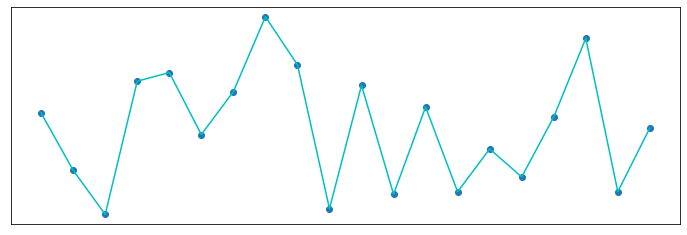

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

x = np.arange(0, 2, 0.1)
y = 2*np.random.randn(20)
y_interp = interp1d(x,y)
y_hat = y_interp(x)

plt.figure(figsize = (12,4))
plt.grid()
plt.xticks([])
plt.yticks([])
plt.scatter(x,y)
plt.plot(x,y_hat,'c-')
plt.show()

## Nội suy tuyến tính

Nội suy tuyến tính là trường hợp đơn giản nhất của bài toán nội suy. Giả sử rằng các điểm dữ liệu được xếp theo thứ tự tăng dần của hoành độ, tức là

$$
    x_i < x_{i+1} \quad \text{với mọi $i$}.
$$

Đối với nội suy tuyến tính, ta giả định rằng điểm cần ước lượng nằm trên đường thẳng nối hai điểm dữ liệu gần nhất bên trái và bên phải của nó:

$$
    \hat{y}(x) = y_i + \frac{y_{i+1}-y_i}{x_{i+1}-x_i}(x-x_i) \quad \text{với} \, x_i < x < x_{i+1}.
$$

__Ví dụ:__ Tìm nội suy tuyến tính tại các điểm $x = 2.2$, $x = 2.8$, $x = 4.1$ dựa trên tập dữ liệu 

$$
    \mathcal{D} = \{(1, 1), (2, 4), (3, 0), (4, -1), (5, 2)\}
$$

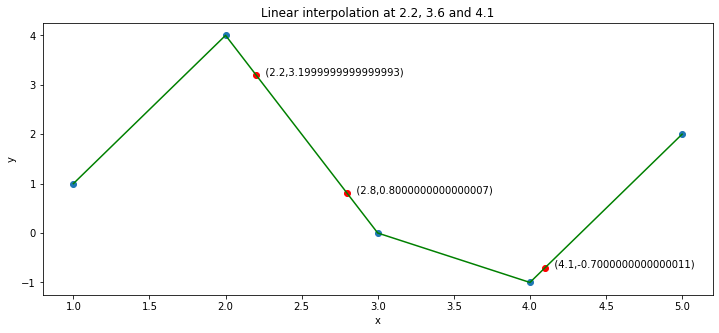

In [69]:
from scipy.interpolate import interp1d

x_data = [1, 2, 3, 4, 5]
y_data = [1, 4, 0, -1, 2]
y_hat = interp1d(x_data,y_data)
x_interp = [2.2, 2.8, 4.1]
y_interp = y_hat(x_interp)

plt.figure(figsize = (12, 5))
plt.xlabel('x')

plt.ylabel('y')
plt.scatter(x_data, y_data)
plt.plot(x_interp, y_interp, 'ro')
plt.plot(x_data, y_hat(x_data),'g')
plt.annotate('   ({},{})'.format(x_interp[0], y_interp[0]), (x_interp[0], y_interp[0]))
plt.annotate('   ({},{})'.format(x_interp[1], y_interp[1]), (x_interp[1], y_interp[1]))
plt.annotate('   ({},{})'.format(x_interp[2], y_interp[2]), (x_interp[2], y_interp[2]))
plt.title("Linear interpolation at 2.2, 3.6 and 4.1")
plt.show()

## Nội suy Lagrange

Mục tiêu của phương pháp nội suy Lagrange là đi tìm hàm ước lượng $\hat{y}(x)$ có dạng một đa thức. Cụ thể như sau

$$
    \hat{y}(x) = \sum_{i=1}^Ny_iL_i(x), \,\, x \in [x_1, x_N] :=L(x),
$$

trong đó $L_i(x)$ là đa thức bậc $N-1$ được xác định bởi

$$
    L_i(x) = \frac{(x - x_1)...(x-x_{i-1})(x-x_{i+1})...(x-x_{N})}{(x_j - x_1)...(x_j-x_{i-1})(x_j-x_{i+1})...(x_j-x_{N})}.
$$

__Ví dụ:__ Cho tập dữ liệu gồm các điểm $(x_i, y_i)$ như sau

$$
    (1.2, 4.2), (2.1, 6.8), (2.8, 9.8), (4.1, 13.4), (4.9, 15.5), (6.2, 19.6)
$$

a) Tìm đa thức nội suy Lagrange $L(x)$

b) Dùng đa thức nội suy Lagrange, ước lượng giá trị của $y$ tại 3.8

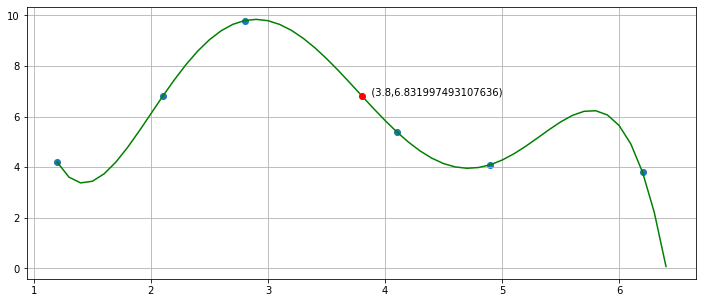

In [100]:
from scipy.interpolate import lagrange
x = [1.2, 2.1, 2.8, 4.1, 4.9, 6.2]
y = [4.2, 6.8, 9.8, 5.4, 4.1, 3.8]
f = lagrange(x,y)
x_new = np.arange(1.2, 6.5, 0.1)
y_new = f(x_new)

x0 = 3.8
y0 = f(3.8)

plt.figure(figsize = (12,5))
plt.grid()
plt.scatter(x,y)
plt.plot(x_new, y_new,'g-')
plt.plot(3.8, f(3.8),'ro')
plt.annotate('   ({},{})'.format(3.8, f(3.8)), (3.8, f(3.8)))
plt.show()

## Nội suy Newton

Ta tìm hàm ước lượng $\hat{y}(x)$ có dạng một đa thức bậc $N-1$ như sau

$$
    N(x) = a_0 + a_1(x-x_0) + a_2(x-x_0)(x-x_1) + \cdots a_{N-1}(x-x_1)...(x-x_{N-1})
$$

trong đó

$$
    a_0 = y_0
$$

$$
    a_1 = \frac{y_1-y_0}{x_1 - x_0} := N[x_1,x_0] \quad (\text{tỉ sai phân cấp 1}) 
$$

$$
    a_2 = \frac{N[x_2,x_1] - N[x_1,x_0]}{x_2 - x_0} :=N[x_2,x_1,x_0] \quad (\text{tỉ sai phân cấp 2}) 
$$
$$
    \vdots
$$

$$
    a_k = \frac{N[x_k,..., x_1] - N[x_{k-1},....,x_0]}{x_k - x_0} :=N[x_k,...,x_1,x_0] \quad (\text{tỉ sai phân cấp $k$}) 
$$

Việc tìm các hệ số của đa thức nội suy Newton có thể tóm tắt trong bảng tỉ sai phân sau đây 

| $x_0$ | $y_0$ |              |                   |                        |                             |
|-------|-------|--------------|-------------------|------------------------|-----------------------------|
|       |       | $f[x_1,x_0]$ |                   |                        |                             |
| $x_1$ | $y_1$ |              | $f[x_2, x_1,x_0]$ |                        |                             |
|       |       | $f[x_2,x_1]$ |                   | $f[x_3, x_2, x_1,x_0]$ |                             |
| $x_2$ | $y_2$ |              | $f[x_3, x_2,x_1]$ |                        | $f[x_4, x_3, x_2, x_1,x_0]$ |
|       |       | $f[x_3,x_2]$ |                   | $f[x_4, x_3, x_2,x_1]$ |                             |
| $x_3$ | $y_3$ |              | $f[x_4, x_3,x_2]$ |                        |                             |
|       |       | $f[x_4,x_3]$ |                   |                        |                             |
| $x_4$ | $y_4$ |              |                   |                        |                             |

In [104]:
import numpy as np
import matplotlib.pyplot as plt

def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
    return coef

In [105]:
def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial 
    at x
    '''
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

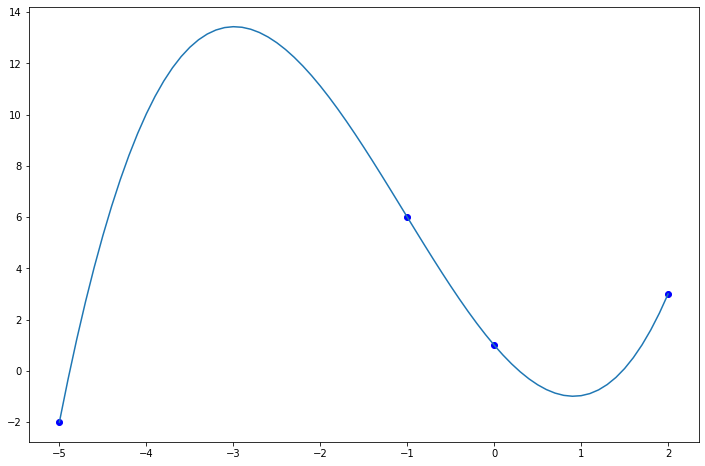

In [106]:
x = np.array([-5, -1, 0, 2])
y = np.array([-2, 6, 1, 3])
# get the divided difference coef
a_s = divided_diff(x, y)[0, :]

# evaluate on new data points
x_new = np.arange(-5, 2.1, .1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)

## Cubic spline 

Một lưới trên đoạn $[a, b]$ là một tập hợp gồm các điểm $x_0, x_1, ..., x_n$ thuộc $[a, b]$ với

$$
    x_0 \equiv a < x_1 < x_2 < \cdots < x_n \equiv b.
$$

Để đơn giản ta ký hiệu lưới này bởi $\Delta_n[a, b]$.

__Cubic spline:__ Một cubic spline trên lưới $\Delta_n[a, b]$ là một hàm $s_n^{3}: [a, b] \longrightarrow  \mathbb{R}$ với tính chất

* $s_n^{3}$ có các đạo hàm $\displaystyle \frac{d s_n^{3}}{dx}$ và $\displaystyle \frac{d^2 s_n^{3}}{dx^2}$ liên tục trên $[a, b]$,


* thu hẹp của $s_n^{3}$ trên $[x_i, x_{i+1}]$ là một đa thức bậc 3:

$$
    s_n^{3}(x) = a_ix^3 + b_ix^2 + c_ix + d_i.
$$

Tập hợp tất cả các cubic spline trên lưới $\Delta_n[a, b]$ được ký hiệu bởi $\mathcal{S}^3(\Delta_n[a, b])$.

__Nội suy với cubic spline:__ Cho trước dữ liệu nội suy $\{(x_i, y_i\}_{i=0}^n$. Một cubic spline $s_n^3$ là ước lượng nội suy của dữ liệu nếu ta có

$$
    s_n^3(x_i) = y_i, \quad \forall \,\, i = 0, 1, ..., n.
$$

Để tìm nội suy cubic spline cho bộ dữ liệu $\{(x_i, y_i\}_{i=0}^n$ ta cần phải xác định tất cả các bộ hệ số

$$
    (a_i, b_i, c_i, d_i), \,\, i = 0, 1,..., n-1.
$$

* Từ các điều kiện $s_n^3(x_i) = y_i$ ta có $2n$ phương trình

$$
    a_ix_i^3 + b_ix_i^2 + c_ix_i + d_i = y_i
$$

$$
    a_ix_{i+1}^3 + b_ix_{i+1}^2 + c_ix_{i+1} + d_i = y_{i+1}
$$

* Điệu kiện về tính trơn (đạo hàm liên tục) tại các điểm trong lưới dẫn đến $2(n-1)$ phương trình

$$
    3a_ix_{i+1}^2 + 2b_ix_{i+1} + c_i = 3a_{i+1}x_{i+1}^2 + 2b_{i+1}x_{i+1} + c_{i +1}
$$

$$
    6a_ix_{i+1} + 2b_i = 6a_{i+1}x_{i+1} + 2b_{i+1}
$$

với $i = 0, 1, ..., n - 2$.

* Ta có thể thêm hai phương trình từ tính triệt tiêu của cubic spline tại hai đầu $x_0$ và $x_n$

$$
    6a_0x_{0} + 2b_0 = 0, \quad 6a_{n-1}x_{n} + 2b_{n-1} = 0
$$

Như vậy các hệ số của cubic spline được tìm bằng cách giải hệ gôm 4n phương trình.